In [9]:
#TD learning

   
import numpy as np
import matplotlib.pyplot as plt


gamma=0.8                             #the discount factor                    
reward=np.array([0, 0, 1, 0, 0])      #the reward amount
pattern_vector=np.zeros((10, 5))      #fixed pattern vectors
pattern_vector[0,2]=1                 #reward is recieved for particular episode          
 
w=np.zeros((1, 10))                   #weight values set to zero for clarity
V_mem=0                               
previous_state=4



TDerror=np.zeros((1,100))             #initialisation of TD errors
rhat=np.zeros((100,5))                #initialistaion of rhat value

In [10]:
for episode in range (0,100):                                        #the loop over episodes 
  TDerror[0,episode]=0                                                 
  
  if episode==50:
    pattern_vector[3,1]=1                                            #new pattern for episode 50
    
  for pattern in range(0,4):                                         #pattern for each episode in a fixed sequence
    V=np.matmul(w, pattern_vector[:,pattern])                        #calculation of value function from the current approximation
    rhat[episode,pattern]=reward[previous_state]+gamma*V-V_mem       #recording of rhat for each time step in each episode
    pv_tpose=np.transpose(pattern_vector[:,previous_state])
    summation=0.2*rhat[episode,pattern]*pv_tpose                     #updating weights with a learning rate α = 0.2
    w=w+summation
    TDerror[0,episode]+=abs(rhat[episode,pattern])                   #calcualtion of learning errors
    previous_state=pattern                                           #Updating short term memories
    V_mem=V



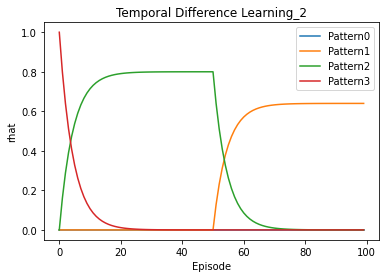

In [11]:
#Plotting the results


epi=np.arange(0, 100, 1, int).reshape(100,1)

for i in range(0,4):
  a=rhat[:,i].reshape(100,1)
  plt.plot(epi,a, label="Pattern"+str(i))
  
plt.legend()
plt.title('Temporal Difference Learning_2')
plt.xlabel("Episode")
plt.ylabel("rhat")
plt.show()
